# Boston Housing Visualization&Prediction

보스턴 하우싱은 간단한 데이터로 변수는 다음과 같다.  

 ![nn](image1.png)

각 변수들은 집값에 영향을 줄 수 있는 것들이고 이에 대한 주택가격을 파악한다.

## Contents

### 1. Data Load and Feature 
### 2. Data Visualizaion
### 3. Data Pre-processing
### 4. Regression Predict 

## 1. Data Load and Feature

In [1]:
# Packages Download

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings(action='ignore')

In [61]:
data = pd.read_csv('BostonHousing.csv')

In [6]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [7]:
print(data.dtypes) # 다 숫자변수

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [9]:
data.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

모든 변수는 숫자변수이며, 이 데이터는 회귀분석을 위한 간단한 데이터셋이다.  

데이터가 500개인 반면 변수가 12개로 많은 편이기에, 이 부분에 대해서 변수선택을 선정하는 것이 메인 이슈이다.  

데이터에 대한 시각화와 상관관계를 분석하고 이를 바탕으로 시각화한다.  

회귀분석은 개인적으로 분류를 위한 알고리즘 사용은 좋아하지 않으므로  
선형인 Linear Regression과 비선형인 MLP로 진행할 것이다.  

### Data Visualizaion

1. 숫자 변수가 너무 많아 상관관계에 유의할 필요가 있다. - heatmap
2. 각 변수들이 숫자 변수이므로, 분포를 파악할 필요가 있다 - boxplot , distplot
3. 이상치에도 예민해서 - scatter plot과 boxplot을 유의할 필요가 있다.

In [62]:
data2 = data[data.columns[:-1]]
data2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
data2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


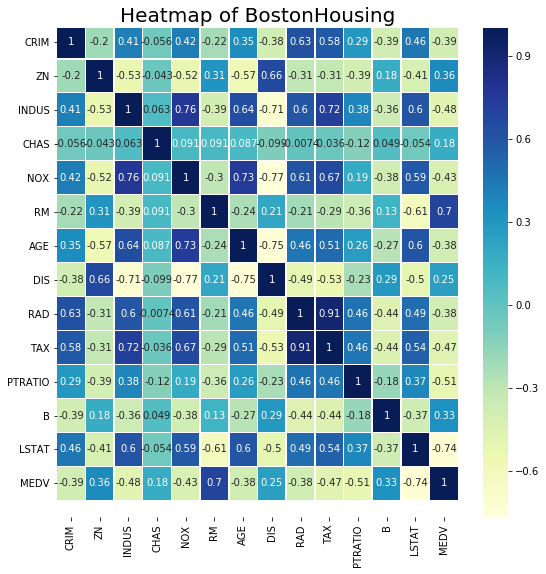

In [11]:
fig, ax = plt.subplots(figsize=(9,9)) 

ax = sns.heatmap(data2.corr(),linewidths=.5,cmap='YlGnBu', annot = True)
buttom , top = ax.get_ylim()
ax.set_ylim(buttom+1, top-0.4)

plt.title('Heatmap of BostonHousing', fontsize=20)
plt.show() 



In [12]:
data2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [62]:
# Distribution Visualization


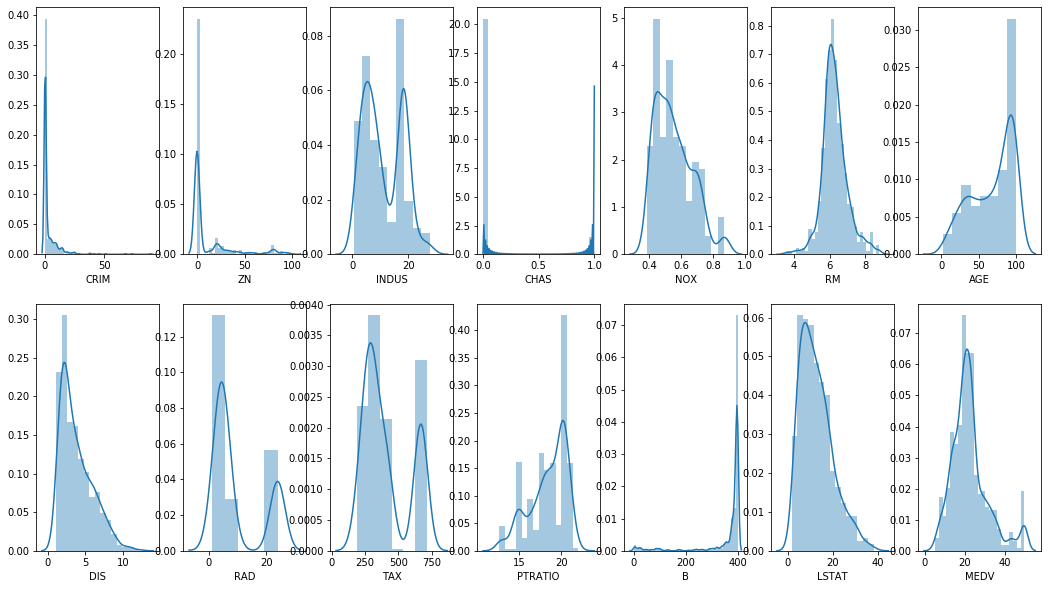

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(18, 10))
index = 0
axs = axs.flatten()
for k,v in data2.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    
# 출처 : https://www.kaggle.com/prasadperera/the-boston-housing-dataset

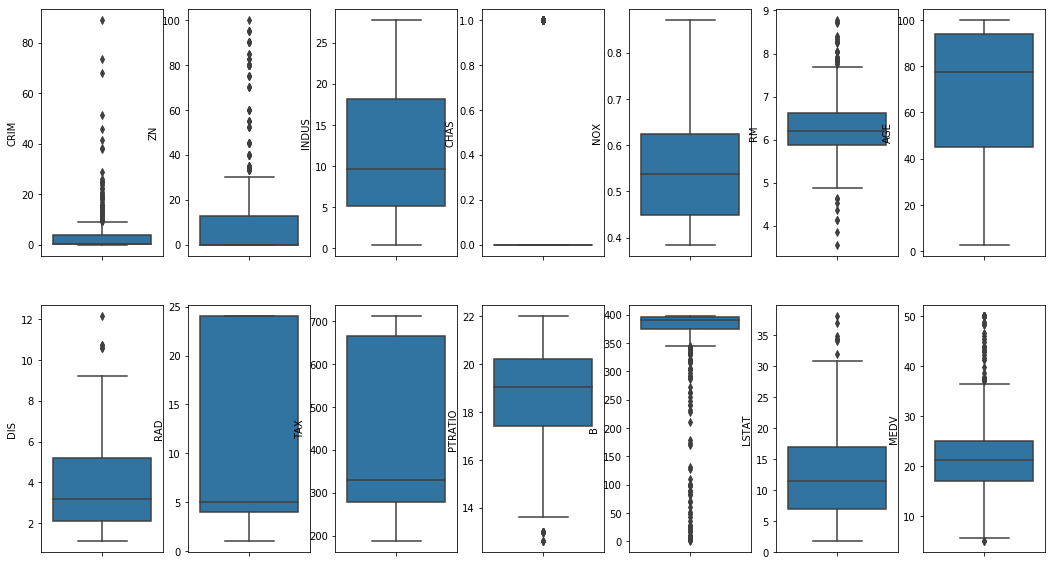

In [31]:
# label 위치 변경 및 색깔 차이
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(18, 10))
index = 0
axs = axs.flatten()
for k,v in data2.items():
    sns.boxplot(v, ax=axs[index], orient = 'v')
    index += 1

crim과 zn의 경우 포아송 분포와 유사해 보인다. log를 통해 정규화를 만들어 주는 것이 유의미 할 수 있다.
nox, rm, age, dis, ptratio, lstat, medv의 경우 분포가 적절해 보인다.
chas 같은 경우는 양 끝에 너무 몰려있는 모습을 보여준다.
B의 경우right skewed의 경우 sqare를 통해 정규분포 유사를 만들수 있다.

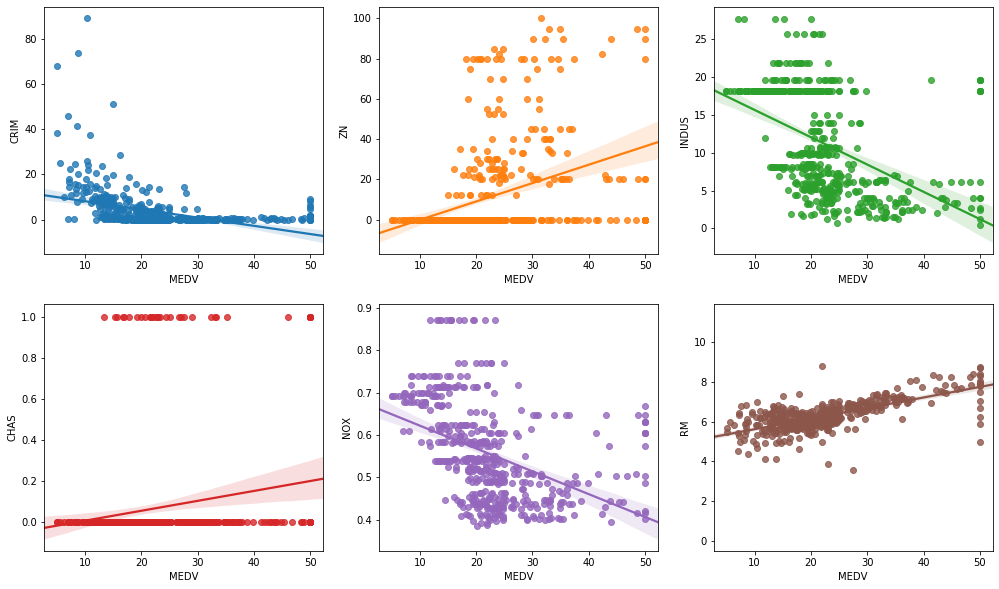

In [32]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(17, 10))
index = 0
axs = axs.flatten()
for k,v in data2[data2.columns[:6]].items():
    sns.regplot(y=v, x=data2['MEDV'], ax=axs[index])
    index += 1
#axs.set_xticklabels(axs.get_xticklabels(), rotation=45)

In [ ]:
crim의 경우 높은것은 확실히 집값이 높다.
zn의 경우, 높으면 의미가 있지만, 30 이상은 의미가 없을것 같다.
indus는 거주지 비율로,낮을수록 거주지다.
chas는 무의미해 보인다.
nox - 일산화 탄소 농도이다.역시 indus와 연관이 높다. 둘 중하나는 삭제하는게 좋아보인다.
rm은 의미가 있다. 방의 개수와 직결되기 때문이다.
crim, zn, indus, medv

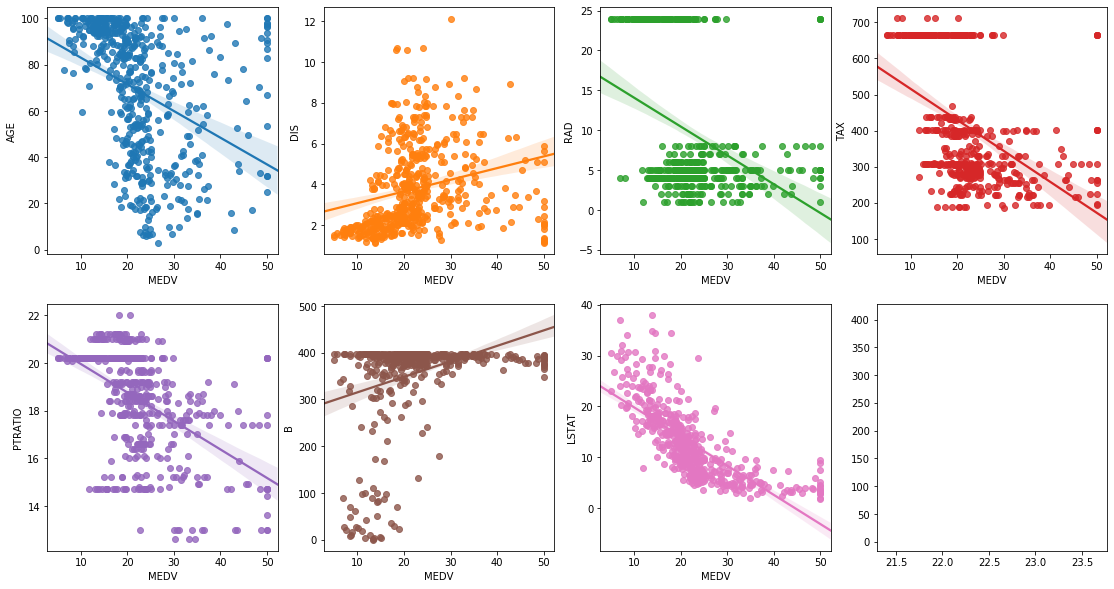

In [26]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(19, 10))
index = 0
axs = axs.flatten()
for k,v in data2[data2.columns[6:-1]].items():
    sns.regplot(y=v, x=data2['MEDV'], ax=axs[index])
    index += 1
#axs.set_xticklabels(axs.get_xticklabels(), rotation=45)

In [ ]:
age는 특정한 의미를 부여하기 어려울 수 있다. 오래되어서 비싼 경우가 있고 아닌 경우가 있다. 빼자
dis는 상관관계도 낮고 분포도 별로다 삭제하자.
rad의 경우, 택스와 상관관계가 매우높다. 반면 택스가 더 상관관계가 높아서 택스가 더 낮다.
tax 사용
ptratio - 학생이 없을 수록 집값이 더 높다.
b는 black으로 특별히 의미가없다. boxplot상 거의 다 300~400이기 때문이다.
rstat - 유의미하다.
tax, ptratio, rstat

## 3. Data Pre-processing

시각화를 통해 선정된 변수들
crim - 더미변수로 변경해서, 높은 애들만 분류한다
zn - 분포에 따라 이상치를 75%값정도로 변경해준다.
indus - 쌍봉이며, 고른 차이가 없음으로, 15를 기준으로 더미화한다.
medv 그냥 사용
tax - 큰 의미를 사용하기 애매하다. 그냥 minmax정도가 적절해보인다.
ptraio - minmax
lsat - minmax
전처리를 위해서 해야할 부분은 크게 3가지로 보인다.
1. 쓸데없는 칼럼 삭제

1. 이상치가 많은 것들은 이상치를 boxplot의 기준과 동일하게 75% percentile에 따라 설정한다.
2. 앞서 Histogram을 바탕으로, Log나 Square과 같은 Scaling 작업을 진행하여 정규분표와 유사하게 변경해준다.
4. 정규화 한다.
3. 상관관계 및 데이터를 바탕으로, 변수를 줄인다.

In [63]:
train =data2
train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
data2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [136]:
train = pd.read_csv('BostonHousing.csv')
train = train[train.columns[:-1]]
train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [137]:
del_columns = ['CHAS', 'NOX','AGE','DIS','RAD','B'] # 버리는 변수 6개, 독립변수 7, 종속변수 1
train.drop(del_columns, inplace = True, axis=1)

In [138]:
# CRIM 변수 더미화
train.loc[train['CRIM'] <5, ['CRIM']] =0
train.loc[train['CRIM'] >=5, ['CRIM']] = 1 

In [140]:
# ZN 변수 이상치 낮추기
train.loc[train['ZN'] >12.5, ['ZN']] =12.5

In [141]:
# INDUS 15기준 나누기
print("15 이상의 수 :",len(train.loc[train['INDUS'] > 15, ['INDUS']]))
print("15 이하의 수 :",len(train.loc[train['INDUS'] <= 15, ['INDUS']]))

train.loc[train['INDUS'] <= 15, ['INDUS']] = 0
train.loc[train['INDUS'] > 15, ['INDUS']] = 1

15 이상의 수 : 192
15 이하의 수 : 314


In [147]:
train[['CRIM','ZN','INDUS']].describe()

,CRIM,ZN,INDUS
count,506.000000,506.000000,506.000000
mean,0.209486,3.310277,0.379447
std,0.407345,5.520939,0.485730
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,12.500000,1.000000
max,1.000000,12.500000,1.000000


In [148]:
#숫자변수 정규화
#(train['RM'] - train['RM'].min())/(train['RM'].max() - train['RM'].min())
def StandardNormal(a,col) :
    a[col] = (a[col] - a[col].min())/(a[col].max() - a[col].min())
StandardNormal(train,'RM')
StandardNormal(train,'TAX')
StandardNormal(train,'ZN')
StandardNormal(train,'PTRATIO')
StandardNormal(train,'LSTAT')
StandardNormal(train,'MEDV')

In [149]:
train.describe()

,CRIM,ZN,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.209486,0.264822,0.379447,0.521869,0.422208,0.622929,0.301409,0.389618
std,0.407345,0.441675,0.485730,0.134627,0.321636,0.230313,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.445392,0.175573,0.510638,0.144040,0.267222
50%,0.000000,0.000000,0.000000,0.507281,0.272901,0.686170,0.265728,0.360000
75%,0.000000,1.000000,1.000000,0.586798,0.914122,0.808511,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Regression Predict

1. data split - 8: 2 정도
2. ols 통한 regression
3. ridge와 lasso를 통해 변수 제어
3. mlp 구현

In [ ]:
# Load Package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error